# Laboratório 2

Análise Exploratória e Aprendizado Não-Supervisionado

*Aluno: Vinícius José de Menezes Pereira*

## Preparação de dados
- Importação de bibliotecas
- Leitura dos dados
- Verificação de dados faltantes

Decisão tomada foi descartar os faltantes
- Normalização das colunas

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [688]:
data =  pd.read_csv('dataset_lab2.csv', encoding='utf-8', sep=",", error_bad_lines=False) 

C:\Users\vinic\AppData\Local\Temp\ipykernel_16528\189978970.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





#### Dados faltantes

In [689]:
print(data.shape)
data = data.dropna(how = 'any')
print(data.shape)

(420, 11)
(413, 11)


#### Para o KMeans, ID é irrelevantes

In [690]:
df = data.drop('id',axis = 1)

#### Normalização

In [691]:
for s in data.columns:
    if s != 'id':
        data[s] = (data[s]-np.mean(data[s]))/np.std(data[s])
        df[s] = (data[s]-np.mean(data[s]))/np.std(data[s])

In [692]:
data.head(10)

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0,0.294591,0.804328,0.047786,0.582155,0.250943,0.236899,-1.558467,0.407223,-0.026234,0.408337
1,1,0.445173,0.786834,0.192541,0.906727,0.514084,0.534117,0.411378,0.637815,0.094224,0.485888
2,2,0.279588,0.695861,0.001063,0.765012,0.314338,0.335971,0.282990,0.412027,-0.043013,0.180243
3,3,0.236618,0.461430,-0.058402,0.531869,0.161887,0.147733,0.120067,0.104571,-0.151855,0.212176
4,4,-0.038430,0.160520,-0.290655,0.056440,-0.144524,-0.248557,-0.220016,-0.106805,-0.319637,0.084444
5,5,-0.054729,0.139526,-0.318349,-0.062417,0.638863,0.588607,-0.202089,-0.217297,-0.440526,-0.052412
6,6,0.275143,0.545405,-0.030708,0.408441,0.264025,0.093243,0.175165,0.181435,-0.089905,0.317099
7,7,0.409426,0.454432,0.090431,0.431298,0.384275,0.276528,0.300653,0.301535,-0.058930,0.394651
8,8,0.987674,1.203210,0.806050,1.153584,1.132441,1.103784,1.196469,1.151843,0.959805,0.650116
9,9,1.484057,2.112939,1.270897,1.574156,1.717591,2.089557,1.460099,1.982935,1.693311,1.548803


## Análise exploratória
- Matriz de scateer-plot
- Boxplot
- Histogramas

#### Scatter plot Matrix

In [693]:
fig = px.scatter_matrix(df)
fig.show()

#### Boxplot dos dados normalizados

{'whiskers': [<matplotlib.lines.Line2D at 0x225741953a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22574195970>,
 'boxes': [<matplotlib.lines.Line2D at 0x225741951f0>,
 'medians': [<matplotlib.lines.Line2D at 0x22574195f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x225741a9220>,
 'means': []}

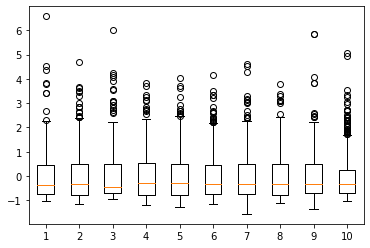

In [694]:
plt.boxplot(df)

#### Histograma das duas features pedido

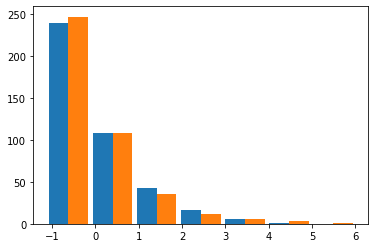

In [695]:
plt.hist([data['humw'],data['ulnal']], 7, rwidth=0.9)
plt.show()

#### Histograma do ID

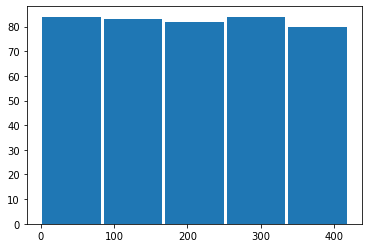

In [696]:
plt.hist([data['id']], 5, rwidth=0.95)
plt.show()

## Aprendizado Não-supervisionado e clusterização

In [697]:
def euclidian_distance(u,v):
    u = np.array(u)
    v = np.array(v)
    distance = np.sqrt(sum((u-v)**2))
    return distance

### Algoritmo k-means
- def __init__(self, k=2, max_iters=100): 

Inicializa parâmetros e cria os arrays de centróides e de clusters.

- def evaluate(self): 

Utiliza a métrica do desvio padrão das distância dos pontos dos clusters aos centróides dividido pelo número de centróides para avaliar a clusterização.

- def predict(self,data):

Função principal que treina os dados. Utiliza as próximas funções como auxiliares e retorna os clusters e os centróides.

- def cluster_labels(self,clusters): 

Rotula os dados conforme seu cluster final.

- def new_clusters(self,centroids): 

A partir dos novos centróides, cria os novos clusters selecionando as amostras mais próximas do centróide

- def new_centroids(self,clusters):

Dados os novos clusters, determina as novas posições dos centróides pela média das features que estão em cada cluster.

- def closest_centroid(self,sample,centroids):

Acha o centróide mais próximo da amostra.

- def converged(self,old,current): 

Chega a convergência, caso os novos centróides tenham mudado muito pouco de posição.

In [698]:
class k_means:
    def __init__(self, k=2, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        # initialize centroids and clusters based on k
        self.centroids = []
        self.clusters = [[] for i in range(self.k)]
        
    def predict(self,data):
        self.data = data
        random_indeces = np.random.choice(self.data.shape[0], self.k, replace=False)
        self.centroids = [self.data.iloc[index] for index in random_indeces]
        # clusters's optimization
        for i in range(self.max_iters):
            self.clusters = self.new_clusters(self.centroids)
            # updating centroids
            old_centroids = self.centroids
            self.centroids = self.new_centroids(self.clusters)
            # break if converged
            if self.converged(old_centroids,self.centroids):
                break
        return self.cluster_labels(self.clusters),self.clusters,self.centroids
          
    def cluster_labels(self,clusters):
        labels = np.empty(self.data.shape[0])
        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        return labels
                
    def new_clusters(self,centroids):
        # reinitialize clusters
        new_clusters = [[] for i in range(self.k)]
        for index in range(len(self.data.index)):
            # select the closest centroid to cluterize the index
            sample = self.data.iloc[index]
            sample = np.array(sample)
            centroid_index = self.closest_centroid(sample, centroids)
            # update the new clusters list
            new_clusters[centroid_index].append(index)
        return new_clusters
    
    def closest_centroid(self,sample,centroids):
        distances = [euclidian_distance(sample, centroid) for centroid in centroids]
        # select de index of the minimum distance sample
        closest_index = np.argmin(distances)
        return closest_index
    
    def new_centroids(self,clusters):
        """
        Given the clusters, get the new centroids based on the mean
        distance to the matching clusters
        """
        new_centroids = np.zeros((self.k, (data.shape[1]-1)))
        for index in range(len(clusters)):
            cluster = clusters[index]
            cluster_mean = np.mean(self.data.iloc[cluster], axis=0)
            cluster_mean = np.array(cluster_mean)
            new_centroids[index] = cluster_mean
        return new_centroids
        
    def converged(self,old,current):
        distances = [euclidian_distance(old[i], current[i]) for i in range(self.k)]
        """ 
        If theres's no significant change on the position of the
        centroids,then we can stop training 
        """
        return np.max(distances) < 10**(-2)
    def evaluate(self):
        """
        Gets the square root of the sum of the errors for each centroid
        """
        sse = 0
        for centroid in self.centroids:
            for cluster in self.clusters:
                for sample_index in cluster:
                    sample = self.data.iloc[sample_index]
                    sample = np.array(sample)
                    sse += (euclidian_distance(sample,centroid))**2
        sse = np.sqrt((sse)/(len(self.data.index)))/self.k
        return sse

### Testando algoritmo

In [699]:
k = k_means(3,300)
pred = k.predict(df)
sse = k.evaluate()
print(sse)
df['predict'] = pred[0]

2.67838142016722


#### Plotando clusterização

In [700]:
fig = px.scatter_matrix(df,color="predict")
fig.show()

Text(0.5, 1.0, 'k=3')

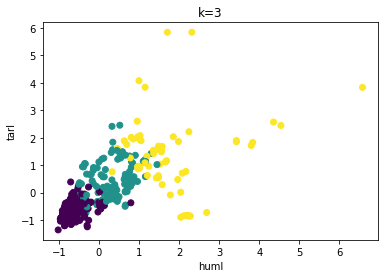

In [704]:
plt.scatter(df['huml'], df['tarl'], c = df['predict'])
plt.xlabel('huml')
plt.ylabel('tarl')
plt.title('k=3')

#### Plotando gráfico da métrica em função de k

In [702]:
v = [3.16,3.10,2.71,2.46,2.54,2.12,1.71,1.83,1.68]
v = np.array(v)
u = [1,2,3,4,5,6,7,8,9]
u = np.array(u)

Text(0, 0.5, 'Desvio padrão médio')

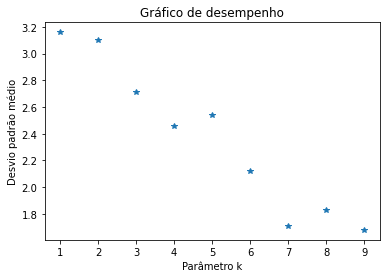

In [703]:
plt.title('Gráfico de desempenho')
plt.plot(u, v,'*')
plt.xlabel('Parâmetro k')
plt.ylabel('Desvio padrão médio')